In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
from scipy.stats import linregress

In [3]:
# Take in all of our traveler data and read it into pandas

world_energy_df = pd.read_csv("Resources/world_energy_consumption.csv")
world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22008,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22009,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
22010,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [4]:
world_energy_df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'biofuel_cons_change_pct',
 'biofuel_cons_change_twh',
 'biofuel_cons_per_capita',
 'biofuel_consumption',
 'biofuel_elec_per_capita',
 'biofuel_electricity',
 'biofuel_share_elec',
 'biofuel_share_energy',
 'carbon_intensity_elec',
 'coal_cons_change_pct',
 'coal_cons_change_twh',
 'coal_cons_per_capita',
 'coal_consumption',
 'coal_elec_per_capita',
 'coal_electricity',
 'coal_prod_change_pct',
 'coal_prod_change_twh',
 'coal_prod_per_capita',
 'coal_production',
 'coal_share_elec',
 'coal_share_energy',
 'electricity_demand',
 'electricity_generation',
 'electricity_share_energy',
 'energy_cons_change_pct',
 'energy_cons_change_twh',
 'energy_per_capita',
 'energy_per_gdp',
 'fossil_cons_change_pct',
 'fossil_cons_change_twh',
 'fossil_elec_per_capita',
 'fossil_electricity',
 'fossil_energy_per_capita',
 'fossil_fuel_consumption',
 'fossil_share_elec',
 'fossil_share_energy',
 'gas_cons_change_pct',
 'gas_cons_change_twh',
 

In [5]:
pd.set_option("display.max_columns", None)
world_energy_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22012 entries, 0 to 22011
Data columns (total 129 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    country                                       object 
 1    year                                          int64  
 2    iso_code                                      object 
 3    population                                    float64
 4    gdp                                           float64
 5    biofuel_cons_change_pct                       float64
 6    biofuel_cons_change_twh                       float64
 7    biofuel_cons_per_capita                       float64
 8    biofuel_consumption                           float64
 9    biofuel_elec_per_capita                       float64
 10   biofuel_electricity                           float64
 11   biofuel_share_elec                            float64
 12   biofuel_share_energy                        

In [6]:
#See how our data looks for unavailable cells
combined_conditions = world_energy_df[
                    world_energy_df.isna().any(axis=1) | (world_energy_df == '').any(axis=1) | (world_energy_df == 0).any(axis=1)]
combined_conditions

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.60,1.519,NaN,500.231,NaN,NaN,NaN,NaN,NaN,71.03,NaN,NaN,NaN,NaN,19.268,NaN,368.65,368.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.75,NaN,NaN,80.225,NaN,NaN,NaN,NaN,NaN,163.22,NaN,NaN,NaN,NaN,NaN,44.275,NaN,184.41,NaN,NaN,NaN,NaN,50.37,NaN,13.663,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,61.50,NaN,NaN,NaN,NaN,NaN,16.682,NaN,NaN,22.53,16.93,NaN,NaN,NaN,NaN,NaN,6.111,4.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.90,NaN,19.775,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.02,1.516,NaN,499.358,NaN,NaN,NaN,NaN,NaN,80.02,NaN,NaN,NaN,NaN,20.147,NaN,397.19,397.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320.51,NaN,NaN,80.694,NaN,NaN,NaN,NaN,NaN,185.35,NaN,NaN,NaN,NaN,NaN,46.665,NaN,198.34,NaN,NaN,NaN,NaN,54.26,NaN,13.661,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,55.14,NaN,NaN,NaN,NaN,NaN,13.883,NaN,NaN,22.42,16.40,NaN,NaN,NaN,NaN,NaN,5.645,4.129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.68,NaN,19.306,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,

In [7]:
world_energy_df=world_energy_df.fillna(0)

In [8]:
world_energy_df['non_renewables_consumption'] = (
    world_energy_df['coal_consumption'] + world_energy_df['gas_consumption']+ world_energy_df['oil_consumption'] + world_energy_df['nuclear_consumption']
)
world_energy_df['Total Energy Consumption'] = (
    world_energy_df['renewables_consumption'] + world_energy_df['non_renewables_consumption'] 
)


In [9]:
world_energy_df['non_renewables_production'] = (
    world_energy_df['coal_electricity'] + world_energy_df['coal_production'] + world_energy_df['gas_production'] +
    world_energy_df['gas_electricity'] + world_energy_df['nuclear_electricity'] + world_energy_df['oil_electricity'] + world_energy_df['oil_production']
)

world_energy_df['Total Energy Production'] = (
    world_energy_df['renewables_electricity'] + world_energy_df['non_renewables_production'] 
)

world_energy_df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production
0,ASEAN (Ember),2000,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.000,71.03,0.000,0.000,0.000,0.000,19.268,0.0,368.65,368.65,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.000,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.000,0.0,0.0,6.111,4.592,0.0,0.000,0.000,0.0,0.0,0.0,0.000,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.750,368.650
1,ASEAN (Ember),2001,0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.000,80.02,0.000,0.000,0.000,0.000,20.147,0.0,397.19,397.19,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.000,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.000,76.68,0.0,19.306,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,55.14,0.0,0.0,0.0,

In [10]:
# Create a new column for the non-renewable energy production, total_ per capita
world_energy_df['non-renewables_prod_per_capita'] = (
    world_energy_df['oil_prod_per_capita'] + world_energy_df['coal_elec_per_capita'] + world_energy_df['gas_elec_per_capita'] + world_energy_df['nuclear_elec_per_capita']
)
world_energy_df['total_prod_per_capita'] = (
    world_energy_df['non-renewables_prod_per_capita'] + world_energy_df['renewables_elec_per_capita']
)
world_energy_df['non-renewables_cons_per_capita'] = (
    world_energy_df['oil_energy_per_capita'] + world_energy_df['coal_cons_per_capita'] + world_energy_df['gas_energy_per_capita'] + world_energy_df['nuclear_energy_per_capita']
)
world_energy_df['total_cons_per_capita'] = (
    world_energy_df['non-renewables_cons_per_capita'] + world_energy_df['renewables_energy_per_capita'])

world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
0,ASEAN (Ember),2000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.60,1.519,0.0,500.231,0.0,0.0,0.0,0.0,0.0,71.03,0.0,0.0,0.0,0.0,19.268,0.0,368.65,368.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,0.0,0.0,80.225,0.0,0.0,0.0,0.0,0.0,163.22,0.0,0.0,0.0,0.0,0.0,44.275,0.0,184.41,0.0,0.0,0.0,0.0,50.37,0.0,13.663,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.50,0.0,0.0,0.0,0.0,0.0,16.682,0.0,0.0,22.53,16.93,0.0,0.0,0.0,0.0,0.0,6.111,4.592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.90,0.0,19.775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,295.75,368.65,0.0,0.0,0.0,0.0
1,ASEAN (Ember),2001,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.02,1.516,0.0,499.358,0.0,0.0,0.0,0.0,0.0,80.02,0.0,0.0,0.0,0.0,20.147,0.0,397.19,397.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.51,0.0,0.0,80.694,0.0,0.0,0.0,0.0,0.0,185.35,0.0,0.0,0.0,0.0,0.0,46.665,0.0,198.34,0.0,0.0,0.0,0.0,54.26,0.0,13.661,0.0,0.0,0.0,0.0,0.0,76.68,0.0,19.306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [11]:
pd.set_option("display.max_columns", None)
count_result = world_energy_df.count()
count_result

country                           22012
year                              22012
iso_code                          22012
population                        22012
gdp                               22012
                                  ...  
Total Energy Production           22012
non-renewables_prod_per_capita    22012
total_prod_per_capita             22012
non-renewables_cons_per_capita    22012
total_cons_per_capita             22012
Length: 137, dtype: int64

In [12]:
countries_world_energy_df = world_energy_df.loc[(world_energy_df['iso_code'] != 0) ]
countries_world_energy_df


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
23,Afghanistan,1900,AFG,4707744.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0
24,Afghanistan,1901,AFG,4751177.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.00,0.0,0.000,0.

In [13]:
countries_world_energy_df=countries_world_energy_df.loc[(countries_world_energy_df["year"] >= 1985)] 
countries_world_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
108,Afghanistan,1985,AFG,10512220.0,1.710848e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.027,0.017,83.394,0.877,0.0,0.0,0.0,0.0,0.0,-2.365,-0.272,1067.071,0.656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.529,6.142,3067.605,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.124,33.124,0.0,0.0,0.0,0.0
109,Afghanistan,1986,AFG,10448447.0,1.764135e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.960,0.052,88.904,0.929,0.0,0.0,0.0,0.0,0.0,2.185,0.245,1097.040,0.650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,3086.329,32.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [14]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Consumption']
    .sum()
    .sort_values(by='Total Energy Consumption', ascending=False)
)
top_countries.head(20)

,country,Total Energy Consumption
208,United States,948293.487
40,China,805460.294
163,Russia,314050.164
100,Japan,211256.825
92,India,190422.609
75,Germany,149707.107
34,Canada,136674.957
69,France,108083.908
26,Brazil,97158.051
207,United Kingdom,93533.580


In [15]:
top_countries = (
    countries_world_energy_df
    .groupby('country', as_index=False)['Total Energy Production']
    .sum()
    .sort_values(by='Total Energy Production', ascending=False)
)
top_countries.head(20)

,country,Total Energy Production
208,United States,777916.880
40,China,737581.028
163,Russia,535058.084
172,Saudi Arabia,232016.980
34,Canada,163226.341
92,India,140452.856
10,Australia,128418.191
94,Iran,126160.440
93,Indonesia,106767.197
125,Mexico,89694.270


In [16]:
top_country_df = countries_world_energy_df.loc[
    countries_world_energy_df['country'].isin([
        'China', 'United States', 'Russia', 'India', 'Japan', 
        'Canada', 'Brazil', 'France', 'South Korea', 'United Kingdom', 'Mexico', 'Spain', 'Italy', 
        'Iran', 'Ukraine', 'South Africa', 'Germany', 'Saudi Arabia', 'Indonesia', 'Australia', 
        'United Arab Emirates', 'Iraq', 'Algeria', 'Kuwait', 'Venezuela', 'Norway', 'Nigeria'
    ])
]

top_country_df=top_country_df.loc[top_country_df['year'] < 2019 ]

top_country_df
                                         
                                      

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
673,Algeria,1985,DZA,22132910.0,1.203642e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,4.358,0.419,452.948,10.025,0.0,0.0,14.286,0.008,2.852,0.063,0.0,3.822,0.00,12.274,4.679,0.807,2.100,11850.976,2.179,0.590,1.527,0.000,0.00,11764.669,260.386,0.000,99.272,-0.930,-1.444,153.807,0.000,0.00,6949.267,9.896,33.622,16869.953,373.381,0.000,58.639,0.00,42.920,0.574,1.910,29.187,0.646,86.307,5.263,0.728,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.715,2.552,96.554,0.000,0.00,4362.454,-3.536,-20.061,24728.770,547.320,0.000,36.811,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,554.559,262.297,42.920,0.574,1.910,0.000,0.00,86.307,0.000,0.728,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,260.386,262.296,920.764,920.764,24728.770,24728.770,11764.669,11850.976
674,Algeria,1986,DZA,22882560.0,1.191450e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.668,0.267,449.799,10.293,0.0,0.0,12.500,0.008,3.103,0.071,0.0,3.7

In [17]:
pd.set_option("display.max_columns", None)
count_result = top_country_df.count()
count_result

country                           918
year                              918
iso_code                          918
population                        918
gdp                               918
                                 ... 
Total Energy Production           918
non-renewables_prod_per_capita    918
total_prod_per_capita             918
non-renewables_cons_per_capita    918
total_cons_per_capita             918
Length: 137, dtype: int64

In [18]:
# Plot energy consumption over time by Country
consumption_plot_country = top_country_df.hvplot.line(
    x='year', y='Total Energy Consumption', by='country',
    title="Total Energy Consumption Over Time by Country",
    xlabel='Year', ylabel='Energy Consumption',
    line_width=2, height=400, width=1000
)
consumption_plot_country

:NdOverlay   [country]
   :Curve   [year]   (Total Energy Consumption)

In [19]:
six_continents = world_energy_df.loc[
    (
        (world_energy_df["country"] == "Asia") |
        (world_energy_df["country"] == "Africa") |
        (world_energy_df["country"] == "Australia") |
        (world_energy_df["country"] == "Europe") |
        (world_energy_df["country"] == "North America") |
        (world_energy_df["country"] == "South America")
    ) & (world_energy_df["year"] >= 1985)  
]
six_continents

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2088.414,2235.495,4911.972,4961.691,5710.555,5800.033,3758.486,4023.185
231,Africa,1986,0,571646786.0,0.0,0.000,0.000,0.000,0.0

In [20]:
six_continents=six_continents.rename(columns={'country': 'continent'})
six_continents

,continent,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,non_renewables_consumption,Total Energy Consumption,non_renewables_production,Total Energy Production,non-renewables_prod_per_capita,total_prod_per_capita,non-renewables_cons_per_capita,total_cons_per_capita
230,Africa,1985,0,555652995.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,3.181,24.268,1416.650,787.166,251.082,139.514,6.244,70.458,2157.661,1198.911,53.869,35.212,0.00,258.986,11.585,4.060,87.218,4023.186,0.0,3.417,68.496,363.062,201.736,3731.344,2073.333,77.895,92.746,7.287,18.940,278.843,50.259,27.927,501.829,10.253,47.027,910.061,505.678,10.783,12.473,0.00,11.148,14.666,146.222,88.994,49.450,263.154,19.094,6.541,13.124,18.722,162.162,99.043,55.034,291.841,21.250,7.254,0.00,0.000,35.414,3.944,15.081,9.565,5.315,27.142,2.052,0.675,2.575,25.288,1007.324,61.721,34.296,1812.865,3.970,114.552,5399.649,3000.331,13.242,45.060,0.859,0.269,0.00,14.957,0.112,0.484,0.000,1.545,0.104,0.000,0.038,466.093,2235.495,11.168,14.778,147.081,89.478,49.719,264.699,19.197,6.579,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2088.414,2235.495,4911.972,4961.691,5710.555,5800.033,3758.486,4023.185
231,Africa,1986,0,571646786.0,0.0,0.000,0.000,0.000,0

In [21]:
#T-TEST 

# Drop any rows with NaN values in the relevant columns
from scipy import stats
six_continents_cleaned = six_continents.dropna(subset=['total_prod_per_capita', 'total_cons_per_capita'])
# Perform the t-test between total production per capita and total consumption per capita
t_statistic, p_value = stats.ttest_ind(
    six_continents_cleaned['total_prod_per_capita'], 
    six_continents_cleaned['total_cons_per_capita'],
    equal_var=False
)

print(f"T-statistic: {t_statistic}, p-value: {p_value}")

T-statistic: -10.633693692517605, p-value: 2.0983809186947106e-22


The t-test results indicate a significant difference between total_prod_per_capita and total_cons_per_capita values.
Given the negative t-statistic, we can conclude that total_prod_per_capita is significantly lower than total_cons_per_capita in the six_continents data.
This finding could imply that, on a per capita basis, production levels are insufficient to meet consumption demands, which might indicate a reliance on energy imports or suggest other factors impacting energy availability and usage across these regions.

In [22]:
#ANOVA TEST 
import warnings
warnings.filterwarnings('ignore')
# Extract individual groups decade
group0 = six_continents[six_continents["year"] == 2012]["total_cons_per_capita"]
group1 = six_continents[six_continents["year"] == 2013]["total_cons_per_capita"]
group2 = six_continents[six_continents["year"] == 2014]["total_cons_per_capita"]
group3 = six_continents[six_continents["year"] == 2015]["total_cons_per_capita"]
group4 = six_continents[six_continents["year"] == 2016]["total_cons_per_capita"]
group5 = six_continents[six_continents["year"] == 2017]["total_cons_per_capita"]
group6 = six_continents[six_continents["year"] == 2018]["total_cons_per_capita"]
group7 = six_continents[six_continents["year"] == 2019]["total_cons_per_capita"]
group8 = six_continents[six_continents["year"] == 2020]["total_cons_per_capita"]
group9 = six_continents[six_continents["year"] == 2021]["total_cons_per_capita"]
group10 = six_continents[six_continents["year"] == 2022]["total_cons_per_capita"]

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9,group10)

F_onewayResult(statistic=0.0066544684672841525, pvalue=0.999999999535522)

The ANOVA test results indicate that there is no significant difference in total_cons_per_capita across the years 2012 to 2022.

In practical terms, this suggests:

Stability over Time: The per capita energy consumption has remained relatively stable across this period, with little to no variation from year to year.
No Notable Trend: If the goal was to assess whether total_cons_per_capita has changed over time, the ANOVA result strongly suggests that it has not, indicating that per capita consumption levels have been consistent across the years analyzed.
This lack of variation could reflect steady consumption patterns globally or within each continent, which might suggest a balance in energy demand and availability on a per capita basis over time.

# Plot energy consumption over time by continent
consumption_plot_1a = six_continents.hvplot.line(
    x='year', y='Total Energy Consumption', by='continent', 
    title="Total Energy Consumption Over Time by Continent",
    xlabel='Year', ylabel='Total Energy Consumption',
    line_width=2, height=400, width=1000
)
consumption_plot_1a

# Plot energy production over time by continent
consumption_plot_1b = six_continents.hvplot.line(
    x='year', 
    y='coal_production', 
    by='continent',  # Group the data by continent
    title="Coal Production Over Time by Continent",
    xlabel='Year',
    ylabel='Coal Production (metric tons)',  # You can adjust this label if necessary
    line_width=2,
    height=400,
    width=1000
)
consumption_plot_1b

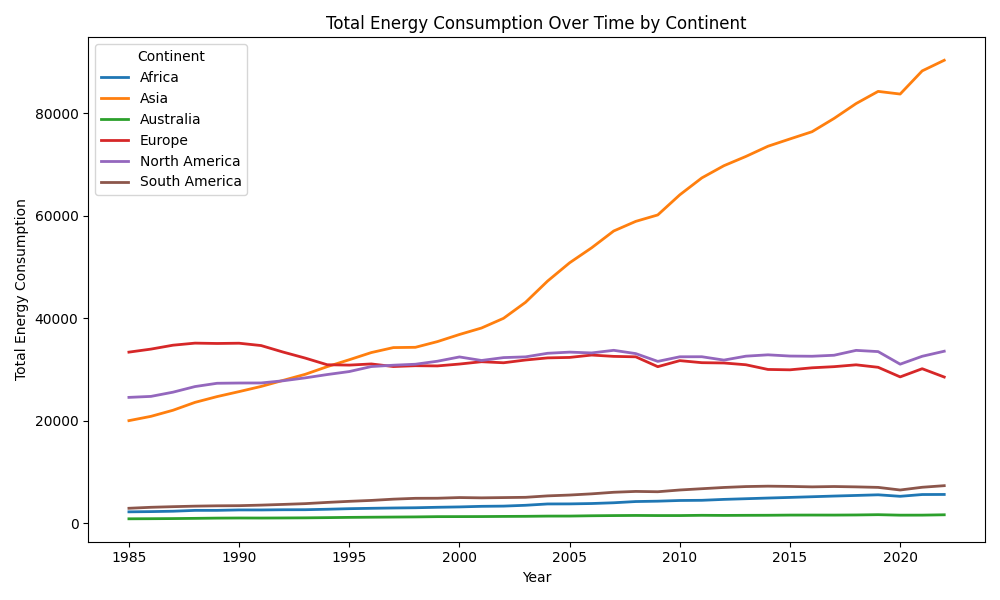

In [23]:
# Plotting the line plot by continent using Matplotlib
plt.figure(figsize=(10, 6))  # Set figure size

# Loop through each continent and plot its line
for continent in six_continents['continent'].unique():
    continent_data = six_continents[six_continents['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['Total Energy Consumption'], label=continent, linewidth=2)

# Add title and labels
plt.title("Total Energy Consumption Over Time by Continent")
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')

# Show legend to identify the continents
plt.legend(title='Continent')

# Display the plot
plt.tight_layout()
plt.show()

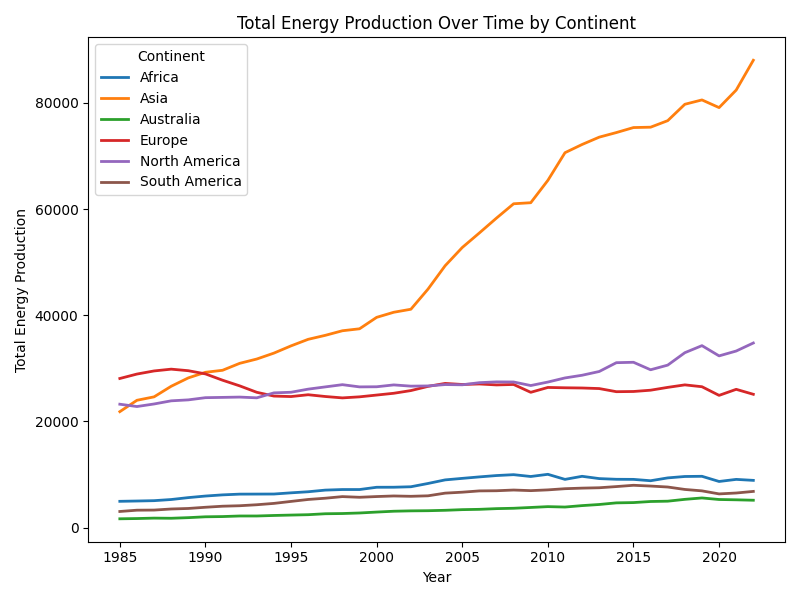

In [24]:
# Plotting the line plot by continent using Matplotlib
plt.figure(figsize=(8, 6))  # Set figure size

# Loop through each continent and plot its line
for continent in six_continents['continent'].unique():
    continent_data = six_continents[six_continents['continent'] == continent]
    plt.plot(continent_data['year'], continent_data['Total Energy Production'], label=continent, linewidth=2)

# Add title and labels
plt.title("Total Energy Production Over Time by Continent")
plt.xlabel('Year')
plt.ylabel('Total Energy Production')

# Show legend to identify the continents
plt.legend(title='Continent')

# Display the plot
plt.tight_layout()
plt.show()

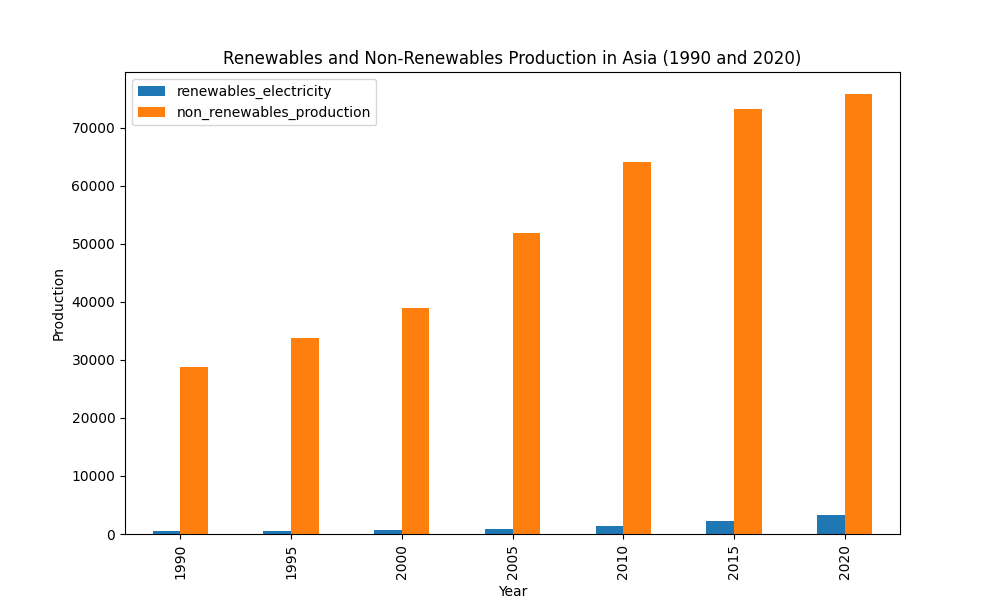

In [25]:
#Filter for Asia and the relevant columns
asia_data = six_continents[(six_continents['continent'] == 'Asia') & 
                           ((six_continents['year'] == 1990)|
                            (six_continents['year'] == 1995)| 
                            (six_continents['year'] == 2000)|
                             (six_continents['year'] == 2005)|
                            (six_continents['year'] == 2010)|
                            (six_continents['year'] == 2015)|
                            (six_continents['year'] == 2020))]

# Group by year and sum production values
asia_grouped = asia_data.groupby('year')[['renewables_electricity', 'non_renewables_production']].sum()

# Plot
asia_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Renewables and Non-Renewables Production in Asia (1990 and 2020)')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

In [26]:
# Filter data for the year 2022
year_2022_data = six_continents[six_continents['year'] == 2022]

# Plot coal consumption for 2022 by continent
consumption_2022_plot = year_2022_data.hvplot.bar(
    x='continent', y='coal_consumption', 
    title="Coal Consumption by Continent in 2022",
    xlabel='Continent', ylabel='Coal Consumption',
    color='blue', height=400, width=600
)

# Plot coal production for 2020 by continent
production_2022_plot = year_2022_data.hvplot.bar(
    x='continent', y='coal_production', 
    title="Coal Production by Continent in 2022",
    xlabel='Continent', ylabel='Energy Production',
    color='green', height=400, width=600
)

(consumption_2022_plot + production_2022_plot).cols(1)

:Layout
   .Bars.I  :Bars   [continent]   (coal_consumption)
   .Bars.II :Bars   [continent]   (coal_production)

In [27]:
# Renewables vs non-renewables energy consumption per continent
energy_mix_plot = year_2022_data.hvplot.bar(
    x='continent', y=['renewables_consumption', 'non_renewables_consumption'], 
    stacked=True, title="Energy Mix by Continent in 2022",
    xlabel='Continent', ylabel='Energy Source Contribution',
    height=400, width=800
)
energy_mix_plot

:Bars   [continent,Variable]   (value)

In [28]:
# Filter data for the year 2018
year_2018_country_df = top_country_df[top_country_df['year'] == 2018]

# Plot total energy consumption per capita for 2018 by country
consumption_2018_country_plot = year_2018_country_df.hvplot.bar(
    x='country', y='total_cons_per_capita', 
    title="Total Energy Consumption per Capita by Country 2018",
    xlabel='Country', ylabel='Energy Consumption Per Capita (kWh)',
    color='teal', height=800, width=1200, rot = 90
)

# Plot total energy production per capita 2018 by country
production_2018_country_plot = year_2018_country_df.hvplot.bar(
    x='country', y='total_prod_per_capita', 
    title="Total Energy Production per Capita by Country in 2018",
    xlabel='Country', ylabel='Energy Production per Capita (kWh)',
    color='darkorange', height=800, width=1200, rot = 90
)

(consumption_2018_country_plot + production_2018_country_plot).cols(1)

:Layout
   .Bars.I  :Bars   [country]   (total_cons_per_capita)
   .Bars.II :Bars   [country]   (total_prod_per_capita)

In [29]:
# Renewables vs non-renewables energy consumption for Top 20 countries
energy_mix_plot_country = year_2018_country_df.hvplot.bar(
    x='country', y=['renewables_consumption', 'non_renewables_consumption'], 
    stacked=True, title="Energy Consumption by Country in 2018",
    xlabel='Country', ylabel='Energy Consumption (TWh) ',
    height=400, width=1200,
    rot=90
)
energy_mix_plot_country

:Bars   [country,Variable]   (value)

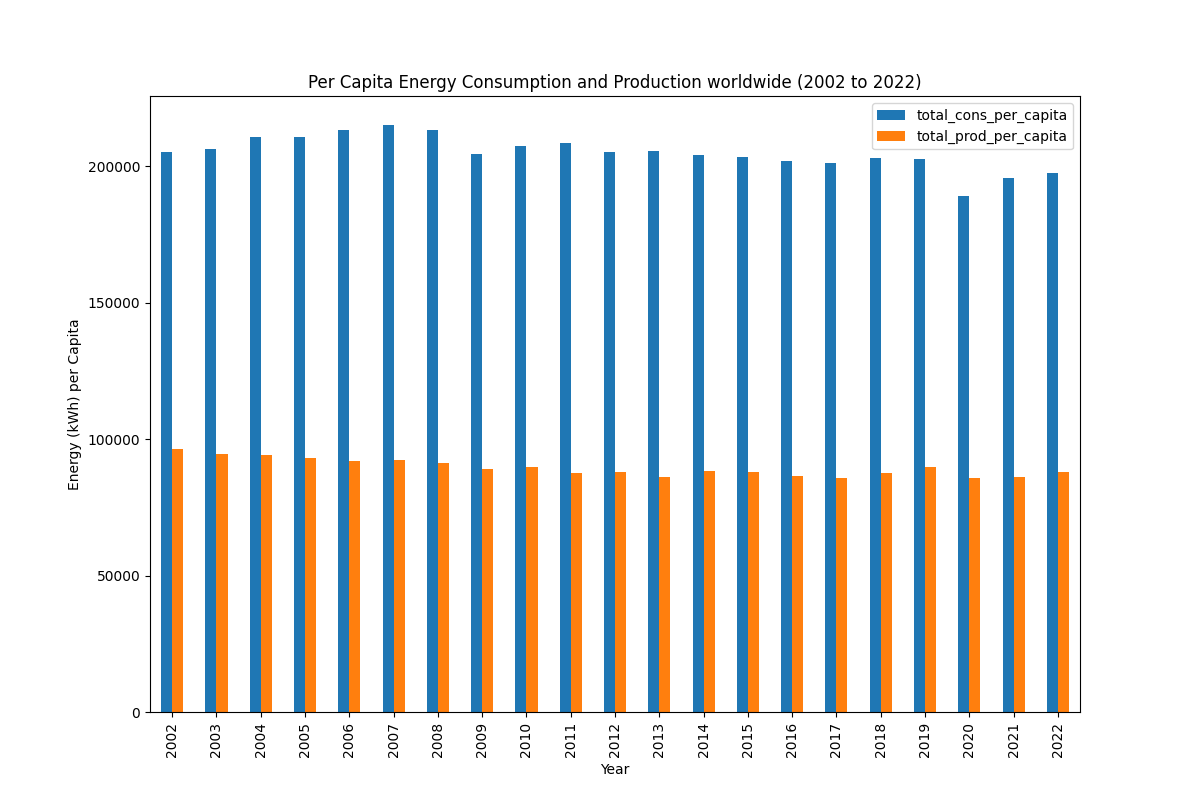

In [30]:
# Filter for the last 20 years and all continents(exclude Antarctica)
#per_capita_data = six_continents[(six_continents['year'].isin([1990, 1995, 2000, 2005, 2010, 2015, 2018]))]
per_capita_data = six_continents[six_continents['year'].isin(range(2002, 2023))]

# Group by year and sum consumption and production per capita
per_capita_relation = per_capita_data.groupby('year')[['total_cons_per_capita', 'total_prod_per_capita']].sum()

# Plotting the bar chart
per_capita_relation.plot(kind='bar', figsize=(12, 8), legend="best")

# Add labels and title
plt.title('Per Capita Energy Consumption and Production worldwide (2002 to 2022)')
plt.xlabel('Year')
plt.ylabel('Energy (kWh) per Capita')
plt.xticks(rotation=90)  # Optional: rotates the x-axis labels to avoid overlap

# Show the plot
#plt.tight_layout()
plt.show()

(918, 2)
Correlation between GDP and renewable energy consumption: 0.78
Linear regression equation: y = 0.00x + 29.07
R-squared: 0.60


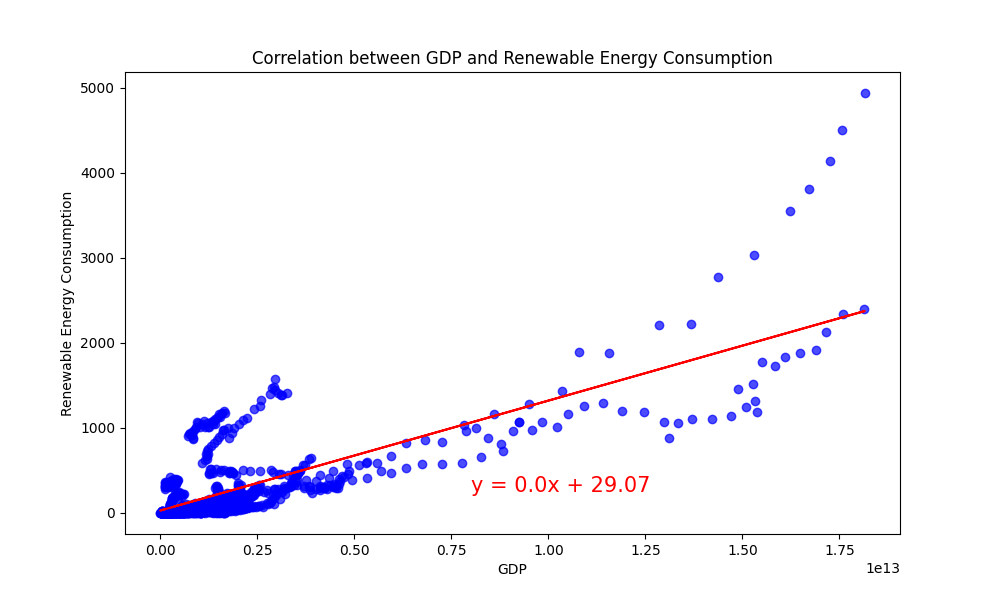

In [31]:
# Check the shape of the data
print(top_country_df[['gdp', 'renewables_consumption']].shape)


# Calculate the Pearson correlation coefficient between % change in GDP and renewable energy consumption
correlation = top_country_df[['gdp', 'renewables_consumption']].corr().iloc[0, 1]
print(f"Correlation between GDP and renewable energy consumption: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    top_country_df['gdp'], top_country_df['renewables_consumption']
)

# Print regression results
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(top_country_df['gdp'], top_country_df['renewables_consumption'], alpha=0.7, color='blue')
plt.plot(top_country_df['gdp'], slope * top_country_df['gdp'] + intercept, color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(8000000000000,250),fontsize=15,color="red")
plt.title('Correlation between GDP and Renewable Energy Consumption')
plt.xlabel('GDP')
plt.ylabel('Renewable Energy Consumption')

plt.show()

Correlation coefficient between energy production and energy consumption: 0.71
Linear regression equation: y = 2.51x + -46029.03
R-squared: 0.50


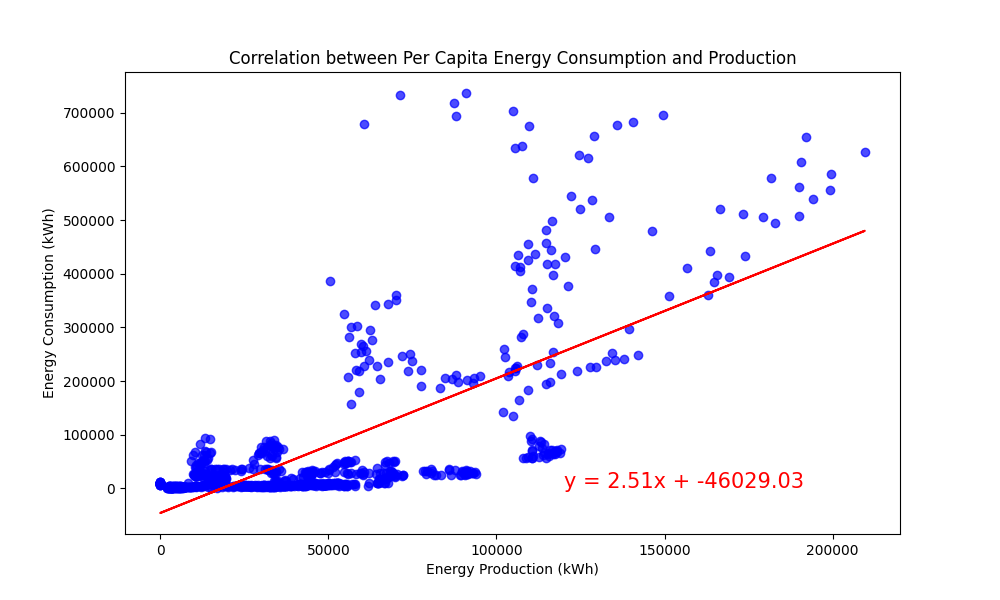

In [32]:
# Scatter plot of energy production vs. energy consumption
plt.figure(figsize=(10, 6))
plt.scatter(top_country_df['total_cons_per_capita'], top_country_df['total_prod_per_capita'], alpha=0.7, color='blue')

plt.title('Correlation between Per Capita Energy Consumption and Production')
plt.xlabel('Energy Production (kWh)')
plt.ylabel('Energy Consumption (kWh)') 

# Calculate the correlation coefficient
correlation = top_country_df['total_cons_per_capita'].corr(top_country_df['total_prod_per_capita'])
print(f"Correlation coefficient between energy production and energy consumption: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(
    top_country_df['total_cons_per_capita'], top_country_df['total_prod_per_capita']
)

# Display results
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

plt.plot(top_country_df['total_cons_per_capita'], slope * top_country_df['total_cons_per_capita'] + intercept, color='red')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(120000,250),fontsize=15,color="red")



plt.show()

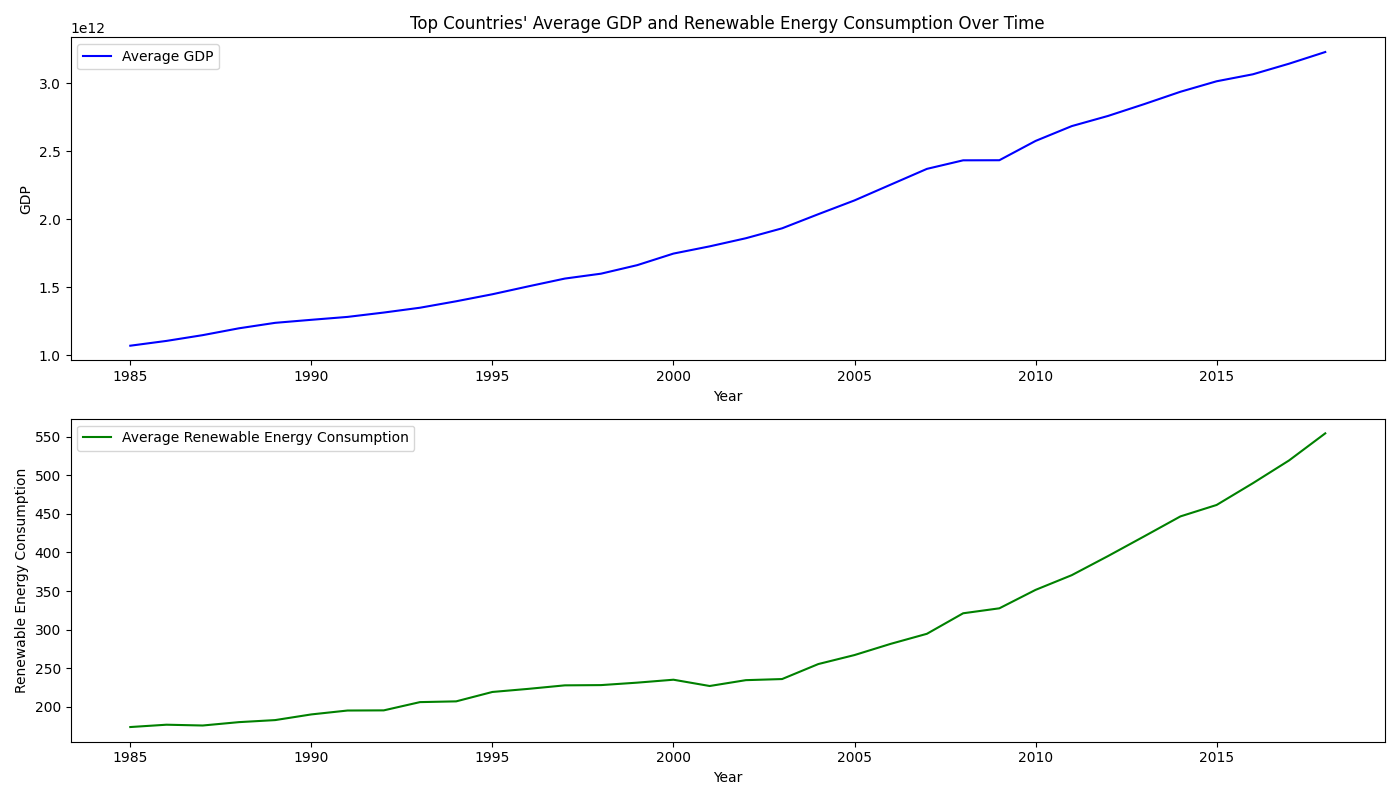

In [33]:
# Grouping by year and aggregating for average values across all countries
df_avg = top_country_df.groupby('year').agg({'gdp': 'mean', 'renewables_consumption': 'mean'})

# Plotting time series of average GDP and Renewable Energy Consumption
plt.figure(figsize=(14, 8))

# GDP plot
plt.subplot(2, 1, 1)
plt.plot(df_avg.index, df_avg['gdp'], color='blue', label='Average GDP')
plt.title("Top Countries' Average GDP and Renewable Energy Consumption Over Time")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

# Renewable energy consumption plot
plt.subplot(2, 1, 2)
plt.plot(df_avg.index, df_avg['renewables_consumption'], color='green', label='Average Renewable Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
renewable_energy_df=six_continents.loc[:,["continent", "year","renewables_consumption"]]
renewable_energy_df

,continent,year,renewables_consumption
230,Africa,1985,147.081
231,Africa,1986,153.209
232,Africa,1987,147.033
233,Africa,1988,160.359
234,Africa,1989,168.263
...,...,...,...
18052,South America,2018,2504.822
18053,South America,2019,2555.755
18054,South America,2020,2531.933
18055,South America,2021,2512.969


In [35]:
non_renewable_energy_df=six_continents.loc[:,["continent", "year","non_renewables_consumption" ]]
non_renewable_energy_df

,continent,year,non_renewables_consumption
230,Africa,1985,2088.414
231,Africa,1986,2128.062
232,Africa,1987,2207.763
233,Africa,1988,2360.171
234,Africa,1989,2356.142
...,...,...,...
18052,South America,2018,4601.896
18053,South America,2019,4452.244
18054,South America,2020,3965.257
18055,South America,2021,4518.662


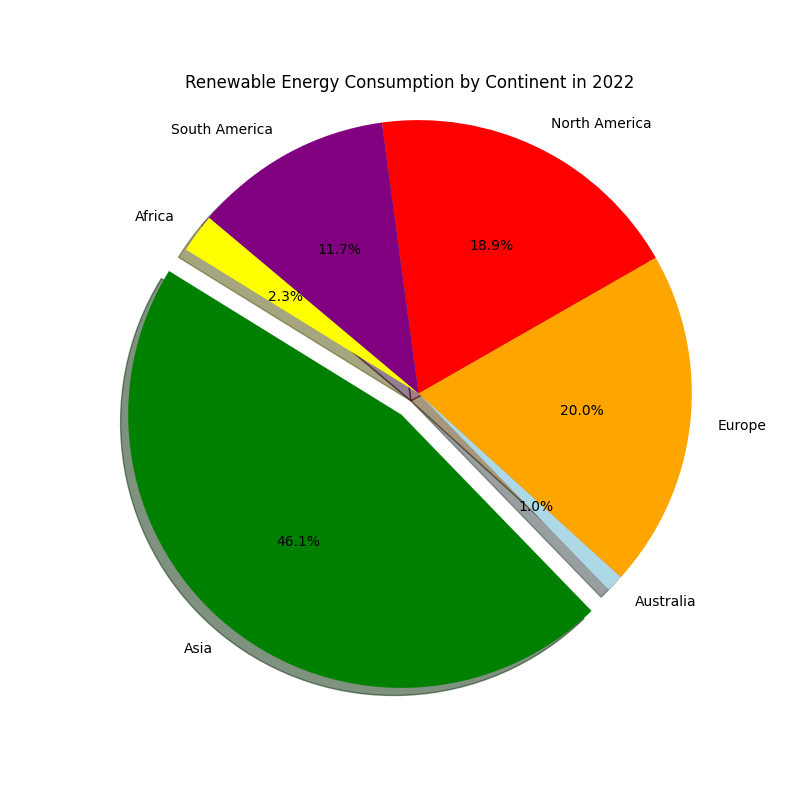

In [36]:
renewable_2022 = renewable_energy_df[renewable_energy_df['year'] == 2022]
non_renewable_2022 = non_renewable_energy_df[non_renewable_energy_df['year'] == 2022]

# Renewable energy consumption pie chart for 2022
#import matplotlib.colors as mcolors

# Define color palettes for renewable and non-renewable pie charts
#renewable_colors = plt.cm.Greens(np.linspace(0.2, 0.8, len(renewable_2022)))
#non_renewable_colors = plt.cm.Reds(np.linspace(0.2, 0.8, len(non_renewable_2022)))
colors=["yellow","green","lightblue","orange","red","purple"]
explode=(0,0.1,0,0,0,0)
plt.figure(figsize=(8, 8))
plt.pie(
    renewable_2022['renewables_consumption'], 
    labels=renewable_2022['continent'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    shadow=True,
    
)
plt.axis("equal")
plt.title("Renewable Energy Consumption by Continent in 2022")
plt.show()

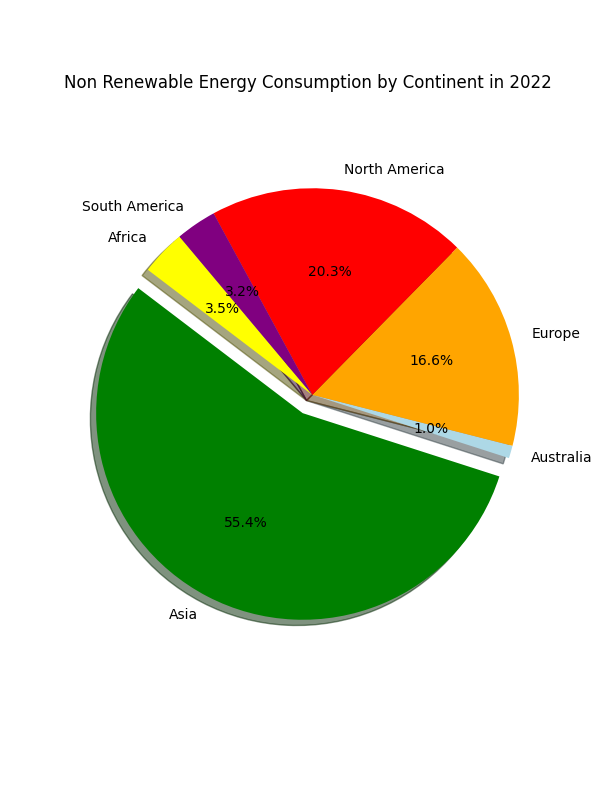

In [37]:
colors=["yellow","green","lightblue","orange","red","purple"]
explode=(0,0.1,0,0,0,0)
plt.figure(figsize=(6, 8))
plt.pie(
    non_renewable_2022['non_renewables_consumption'], 
    labels=renewable_2022['continent'], 
    autopct='%1.1f%%', 
    startangle=130, 
    colors=colors,
    explode=explode,
    shadow=True,
    
)
plt.axis("equal")
plt.title("Non Renewable Energy Consumption by Continent in 2022")
plt.show()